### Sharan S
### Assignment - 7 - crime_data - Clustering 

#### Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

data=pd.read_csv("C:\\Users\\SHARAN\\Desktop\\ExcelR\\Assignment\\Assignment_7_clustering\\crime_data.csv")
data.head(3)


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0


In [2]:
def minmax_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)
df_norm=minmax_func(data.iloc[:,1:])
df_norm.head(3)


,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403


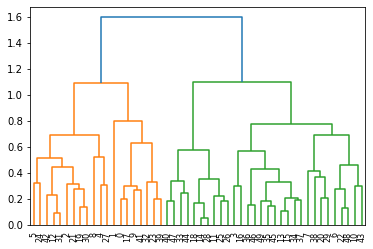

In [3]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='complete'))

In [4]:
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')
hc


AgglomerativeClustering(linkage='complete', n_clusters=4)

In [5]:
y_hc=hc.fit_predict(df_norm)
clusters=pd.DataFrame(y_hc,columns=['clusters'])
clusters.head(5)


,clusters
0,0
1,0
2,3
3,1
4,3


In [6]:
clusters.value_counts()

clusters
1           20
3           12
2           10
0            8
dtype: int64

In [7]:
data['cluster']=y_hc
data.head(5)


,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3


In [8]:
# mean of each cluster
data.groupby(data.cluster).mean()


,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,14.087500,252.750000,53.500000,24.5375
1,5.715000,132.300000,70.800000,18.1000
2,3.180000,78.700000,49.300000,11.6300
3,10.883333,256.916667,78.333333,32.2500


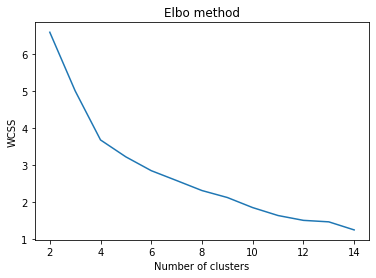

In [9]:
# K-Mean
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
WCSS=[]
for i in range(2,15):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_norm)
    WCSS.append(kmeans.inertia_)
plt.plot(range(2,15),WCSS)
plt.title('Elbo method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [10]:
from sklearn.cluster import KMeans
clusters_new=KMeans(4,random_state=42)
clusters_new.fit(df_norm)
clusters_new.labels_

array([2, 1, 1, 2, 1, 1, 3, 3, 1, 2, 3, 0, 1, 3, 0, 3, 0, 2, 0, 1, 3, 1,
       0, 2, 3, 0, 0, 1, 0, 3, 1, 1, 2, 0, 3, 3, 3, 3, 3, 2, 0, 2, 1, 3,
       0, 3, 3, 0, 0, 3])

In [11]:
data['clusterid_new']=clusters_new.labels_
data.head(3)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster,clusterid_new
0,Alabama,13.2,236,58,21.2,0,2
1,Alaska,10.0,263,48,44.5,0,1
2,Arizona,8.1,294,80,31.0,3,1


In [12]:
clusters_new.cluster_centers_

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951]])

In [13]:
data.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape,cluster
,,mean,mean,mean,mean,mean
0,0,3.600000,78.538462,52.076923,12.176923,1.769231
1,1,10.966667,264.000000,76.500000,33.608333,2.750000
2,2,13.937500,243.625000,53.750000,21.412500,0.125000
3,3,5.852941,141.176471,73.647059,19.335294,1.117647


In [14]:
data['clusterid_new']=data['clusterid_new'].replace(0,'cluster 1')
data['clusterid_new']=data['clusterid_new'].replace(1,'cluster 2')
data['clusterid_new']=data['clusterid_new'].replace(2,'cluster 3')
data['clusterid_new']=data['clusterid_new'].replace(3,'cluster 4')
data.head(3)


,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster,clusterid_new
0,Alabama,13.2,236,58,21.2,0,cluster 3
1,Alaska,10.0,263,48,44.5,0,cluster 2
2,Arizona,8.1,294,80,31.0,3,cluster 2


In [15]:
data['clusterid_new'].value_counts()

cluster 4    17
cluster 1    13
cluster 2    12
cluster 3     8
Name: clusterid_new, dtype: int64

In [16]:
# DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics
dbscan=DBSCAN(eps=0.4,min_samples=6)
dbscan.fit(df_norm)
data['DB cluster']=pd.DataFrame(dbscan.labels_)
data.head(3)


,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster,clusterid_new,DB cluster
0,Alabama,13.2,236,58,21.2,0,cluster 3,0
1,Alaska,10.0,263,48,44.5,0,cluster 2,-1
2,Arizona,8.1,294,80,31.0,3,cluster 2,0


In [17]:
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [18]:
data['DB cluster'].value_counts()

 0    49
-1     1
Name: DB cluster, dtype: int64

In [19]:
z=metrics.silhouette_score(df_norm,dbscan.labels_)
z


0.21033337025958493

In [20]:
# Bad clustering